In [1]:
import matplotlib.pyplot as plt
import numpy as np

import eagle_tools

# The module has a little helper function to auto-set some plotting configs.
plotconfig = eagle_tools.plot.config()

In [12]:
# Pick a galaxy. Group number 1000 happens to be a nice Milky Way-like spiral
groupnumber = 1000
subgroupnumber = 0

# Initialise the snapshot object. Sets everything up but doesn't load things into memory yet.
snap = eagle_tools.read.Snapshot(
        sim = "L0100N1504",
        model = "REFERENCE",
        tag = '028_z000p000',
        data_location = "/mnt/aridata1/projects/EAGLE"
    )

In [45]:
# Select all the gas within r_200 of our chosen galaxy. Doesn't load anything yet - just identifies what we would need to load.
halo_gas = snap.select_halo(groupnumber,subgroupnumber,parttype=0,radius='FOF/Group_R_Crit200') 

In [14]:
# Out of interest - what's the halo mass for this halo?

snap.load_subfind('FOF/Group_M_Crit200')
m200 = snap.subfind['FOF/Group_M_Crit200']
np.log10(1e10*m200[groupnumber])

12.164588633509538

/tmp/ipykernel_439171/4263647743.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot')


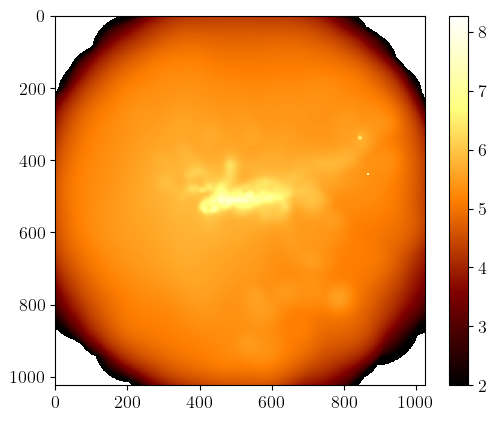

In [34]:
# Let's try the imaging function without much fancy stuff. I pass in the halo_gas object we made earlier, and tell it I want to
# make an image of the mass. SPHViewer will identify that we want the mass density in each pixel, integrated along the line of sight.
# By default it won't do any projections - the "camera" is at infinity. More advanced sphviewer stuff related to this could be used by employing the snap.set_scene function to get a sphviewer.Scene object instead.
# We can use the "align" keyword argument to align the image along the edge of the galaxy disc.

image = snap.image(halo_gas,'Mass',align='edge')

# Convert from code units to more sensible ones.
image *= 1e10/1e6 # convert to Msol, and from Mpc^-2 to kpc^-2

# By default imshow applies anti-aliasing. Set "interpolation='none'" to get rid of it.
plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot')
plt.colorbar()

# By default the image will run up until the edge of what we loaded with select_halo, which here is r_200.
# Note that there are chunks missing at the corners, as select_halo loads a sphere by default.
# Also note that the x and y axes show pixel number (this is a 1024x1024 image by default), not physical distance. 

/tmp/ipykernel_439171/4044601472.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot')


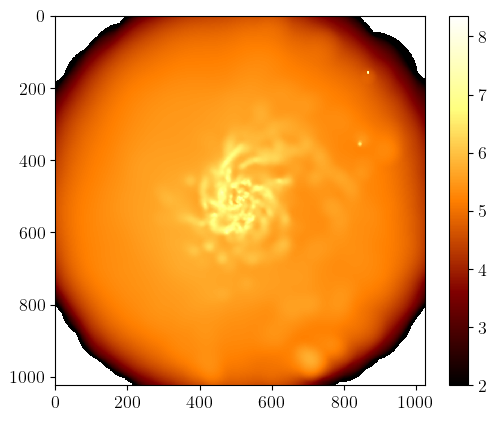

In [36]:
# Here's the same thing but now aligned face-on

image = snap.image(halo_gas,'Mass',align='face')
image *= 1e10/1e6 # convert to Msol, and from Mpc^-2 to kpc^-2
plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot')
plt.colorbar()

/tmp/ipykernel_439171/3107454894.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(image),interpolation='none',cmap='viridis')


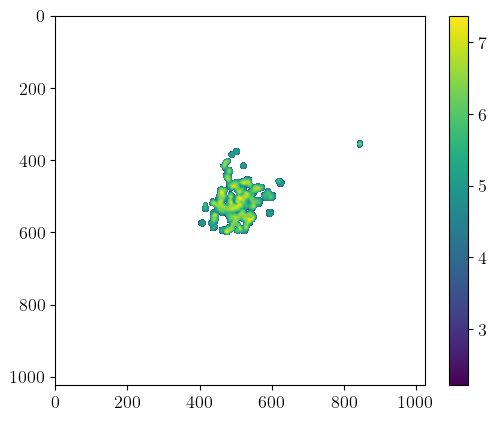

In [46]:
# We can pass indices to the "selection" kwarg of the imaging function, to only include certain particles from halo_gas.
# For example, we could plot only star-forming particles.
# It's a pretty ugly image but this is just for demonstration

star_forming = np.where(snap.load(halo_gas,'StarFormationRate')>0.)[0]

image = snap.image(halo_gas,'Mass',align='face',selection=star_forming)
image *= 1e10/1e6 # convert to Msol, and from Mpc^-2 to kpc^-2
plt.imshow(np.log10(image),interpolation='none',cmap='viridis')
plt.colorbar()

In [39]:
# Let's try zooming out and loading a 1 Mpc sphere around the galaxy.

halo_gas = snap.select_halo(groupnumber,subgroupnumber,parttype=0,radius=1.) 

/tmp/ipykernel_439171/175994177.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot',extent=[-1.,1.,-1.,1.])


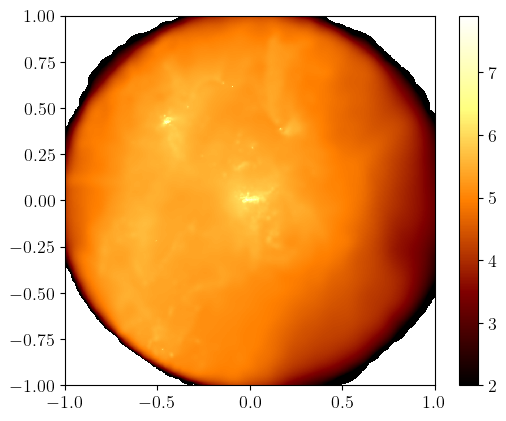

In [40]:
# Let's plot this. Now I'm going to pass the "extent" keyword to imshow, so that it sets the axes properly.

image = snap.image(halo_gas,'Mass',align='edge')
image *= 1e10/1e6 # convert to Msol, and from Mpc^-2 to kpc^-2
plt.imshow(np.log10(image),interpolation='none',vmin=2.,cmap='afmhot',extent=[-1.,1.,-1.,1.])
plt.colorbar()

/tmp/ipykernel_439171/317069684.py:2: RuntimeWarning: divide by zero encountered in log10
  np.log10(image),


(-0.5, 0.5)

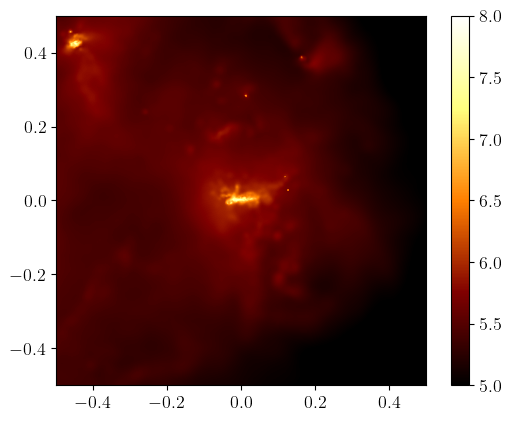

In [21]:
# Even though we made an image of the whole sphere, we can zoom in using the standard plt.xlim etc. commands.
# Here I've set some tighter vmin/vmax limits now we've got rid of the ugly edges.

plt.imshow(
    np.log10(image),
    interpolation='none',
    cmap='afmhot',
    extent=[-1.,1.,-1.,1.],
    vmin=5.,
    vmax=8.)

plt.colorbar()
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

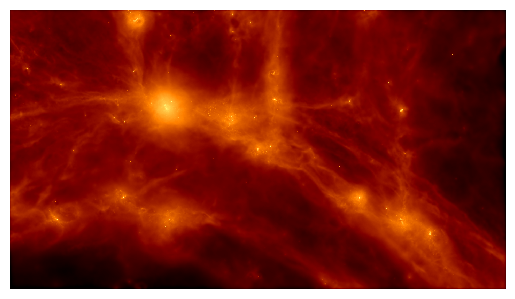

In [41]:
# Now let's try making a wallpaper-worthy pretty image. This will make a nice 16:9 image perfect for a screen.
# I'm going to be lazy and make the region 16 Mpc x 9 Mpc.

# This time I'm going to load a "cube" shape of side length 16.
# select_halo only supports spheres or cubes right now so we will waste a bit of time loading stuff outside the image.
halo_gas = snap.select_halo(groupnumber,subgroupnumber,parttype=0,shape='cube',side_length=16.) 

# Now I'm going to set the resolution in the imaging function to something suitable for a wallpaper.
# You could also use 2560x1440 or 4K etc.
image = snap.image(
    halo_gas,'Mass',
    extent=[-8.,8.,-4.5,4.5],
    xres=1920,
    yres=1080
    )

image *= 1e10/1e6 # convert to Msol, and from Mpc^-2 to kpc^-2

plt.imshow(np.log10(image),cmap='afmhot',vmin=4.,vmax=8.,
           interpolation='none',
           )

plt.axis('off')

plt.show()

In [43]:
# To get just the image at the correct resolution with no whitespace etc, use imsave

plt.imsave("test_nice_image.png",
           np.log10(image),cmap='afmhot',vmin=4.,vmax=8.,
           )